In [13]:
import numpy as np  # 수치계산 패키지
import pandas as pd  # 데이터분석 패키지
import matplotlib.pyplot as plt  # 그래프 그리는 패키지
import seaborn as sns   # 그래프 그리는 패키지

# csv를 파이썬에 로딩하겠습니다.
# 판다스 패키지의 csv파일 읽는 기능으로 데이터를 읽어들입니다.
data_predict = pd.read_csv('Admission_Predict_Ver1.1.csv')

# 로딩한 파일 첫 5줄 표시. 어떤 정보들이 있는지 간단히 확인 (sql의 select * from a_table 이런느낌)
# 값을 입력하지 않으면 5줄 표시
data_predict.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [14]:
# 전체 데이터 셋 중 하나라도 null 값 있는지 검사
data_predict.isnull().values.any()

False

In [16]:
# 컬럼별로 null값 몇갠지 전부 조사한다
data_predict.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [19]:
# 학점을 기준으로 상위 20명의 학생을 추리고 싶다면?
# 데이터 분석 시, 가장 핵심적인 요인을 파악하기 위해 각 항목별 내림차순으로
# 데이터를 나열하여 어떤 요인이 결과를 가장 잘 설명하는지 개략적인 감을 잡을 수 있다.
df_sort_group_top20 = data_predict.sort_values(by="CGPA", ascending=False).head(20)
df_sort_group_top20 = data_predict.sort_values(by="TOEFL Score", ascending=False).head(20)
df_sort_group_top20 = data_predict.sort_values(by="SOP", ascending=False).head(20)
df_sort_group_top20

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
45,46,322,110,5,5.0,4.0,9.10,1,0.88
189,190,324,112,5,5.0,5.0,9.08,1,0.88
35,36,320,110,5,5.0,5.0,9.20,1,0.88
284,285,340,112,4,5.0,4.5,9.66,1,0.94
276,277,329,113,5,5.0,4.5,9.45,1,0.89
260,261,327,108,5,5.0,3.5,9.13,1,0.87
259,260,331,119,4,5.0,4.5,9.34,1,0.90
258,259,326,102,4,5.0,5.0,8.76,1,0.77
91,92,299,97,3,5.0,3.5,7.66,0,0.38
234,235,330,113,5,5.0,4.0,9.31,1,0.91


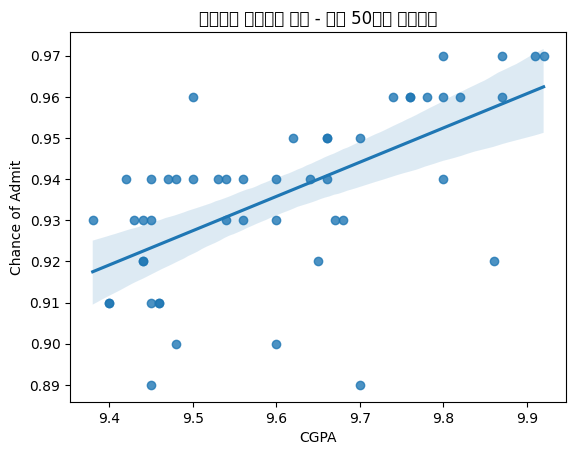

In [23]:
# 그래프를 그려서 학점과 대학원 합격류과의 연관성을 시각화해보자.
fig = sns.regplot(x="CGPA", y="Chance of Admit", data = data_predict.sort_values(by="CGPA", ascending=False).head(50))
plt.title("합격률과 학점과의 관계 - 상위 50명을 대상으로")
plt.show()

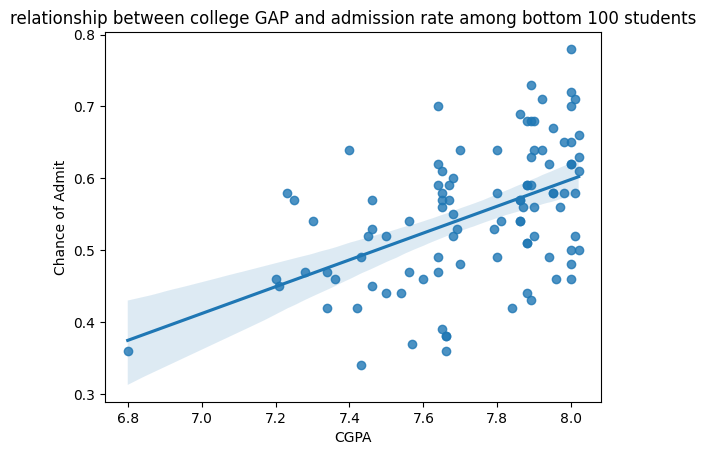

In [26]:
# 하위 100명 대상 .head(100) -> .tail(100)
fig = sns.regplot(x="CGPA", y="Chance of Admit", data = data_predict.sort_values(by="CGPA", ascending=False).tail(100))
plt.title("relationship between college GAP and admission rate among bottom 100 students")
plt.show()

Text(0.5, 0, 'top 100 studnets admission rate')

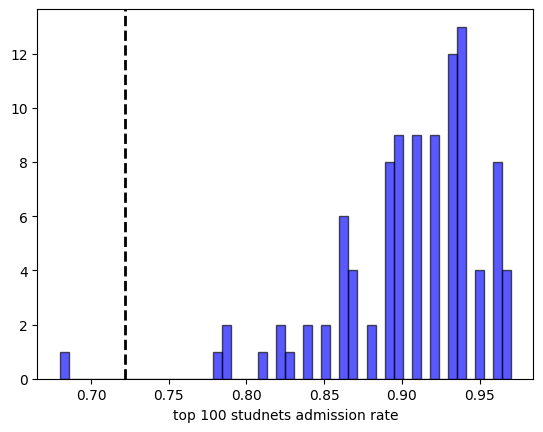

In [28]:
# 학점 기준 상위 100명의 히스토그램 + 평균 합격률을 점선으로 표시

# alpha 는 그래프 투명도, edgecolor는 막대 테두리색깔
# matplotlibe에서 히스토그램을 그리는데 (plt.hist)
# 학점 기준 상위 100명을 불러서 합격률 단위로
# 학생의 분포수를 나타낸다 bins의 의미는 전체 중 몇 등분?
result = plt.hist(data_predict.sort_values
                  (by="CGPA", ascending=False).head(100)['Chance of Admit'],
                   bins=50, color='b', edgecolor='k', alpha=0.65)

# axvline 기능으로 전체 평균값을 검은 점선으로 그린다.
plt.axvline(data_predict['Chance of Admit'].mean(),color='k', linestyle='dashed', linewidth=2)
# xlabel은 x축의 제목을 표시합니다.
plt.xlabel("top 100 studnets admission rate")

# 상위권은 구간별편차가 큰 것을 확인 할 수 있다.

Text(0.5, 0, 'bottom 100 students admission rate')

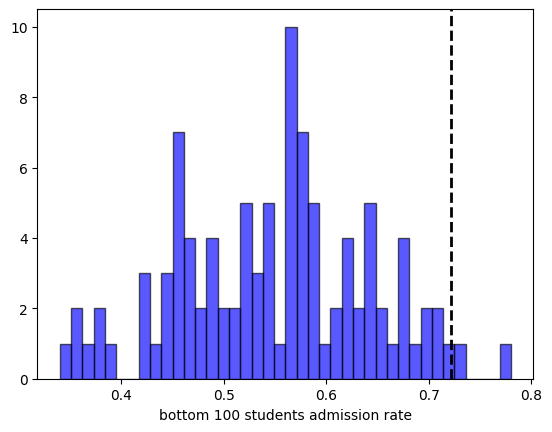

In [30]:
# 학점 기준 하위 100명의 히스토그램 + 평균 합격률을 점선으로 표시

result = plt.hist(data_predict.sort_values(by="CGPA", ascending=False).tail(100)['Chance of Admit'],
                  bins=40, color='b', edgecolor='k', alpha=0.65)
plt.axvline(data_predict['Chance of Admit'].mean(),
            color='k', linestyle='dashed', linewidth=2)
plt.xlabel("bottom 100 students admission rate")
# 중간값을 중심으로 고르게 분포되어 있다.

([<matplotlib.axis.XTick at 0x1ed1de0a3f0>,
 [Text(1, 0, 'CGPA'),
  Text(2, 0, 'GRE'),
  Text(3, 0, 'TOEFL'),
  Text(4, 0, 'Admit')])

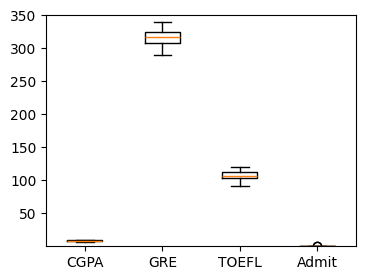

In [32]:
# 영어점수, 학점, gre시험과 합격률의 관계를 그래프로 나타내려 합니다.
# 아래처럼 그렸을 때 문제점이 무엇인지 말해보세요.

plt.style.use('default')
# 그래프의 크기는 가로4 세로3입니다.
plt.rcParams['figure.figsize'] = (4, 3)
# 폰트크기는 10입니다.
plt.rcParams['font.size'] = 10
# 한 화면에 여러 그래프 그릴 때
fig, ax1 = plt.subplots()

ax1.boxplot([data_predict['CGPA'],
             data_predict['GRE Score'],
             data_predict['TOEFL Score'],
             data_predict['Chance of Admit']])
# y축 값 범위 지정
ax1.set_ylim(0.2, 350)
plt.xticks([1,2,3,4], ['CGPA', 'GRE', 'TOEFL', 'Admit'])

([<matplotlib.axis.XTick at 0x1ed22780590>,
 [Text(1, 0, 'CGPA'),
  Text(2, 0, 'GRE'),
  Text(3, 0, 'TOEFL'),
  Text(4, 0, 'Admit')])

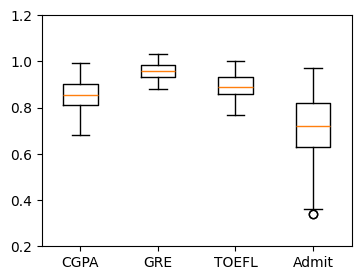

In [35]:
plt.style.use('default')
# 그래프의 크기는 가로4 세로3입니다.
plt.rcParams['figure.figsize'] = (4, 3)
# 폰트크기는 10입니다.
plt.rcParams['font.size'] = 10
# 한 화면에 여러 그래프 그릴 때
fig, ax1 = plt.subplots()

ax1.boxplot([data_predict['CGPA']/10.0,
             data_predict['GRE Score']/330.0,
             data_predict['TOEFL Score']/120.0,
             data_predict['Chance of Admit']])
# y축 값 범위 지정
ax1.set_ylim(0.2, 1.2)
plt.xticks([1,2,3,4], ['CGPA', 'GRE', 'TOEFL', 'Admit'])

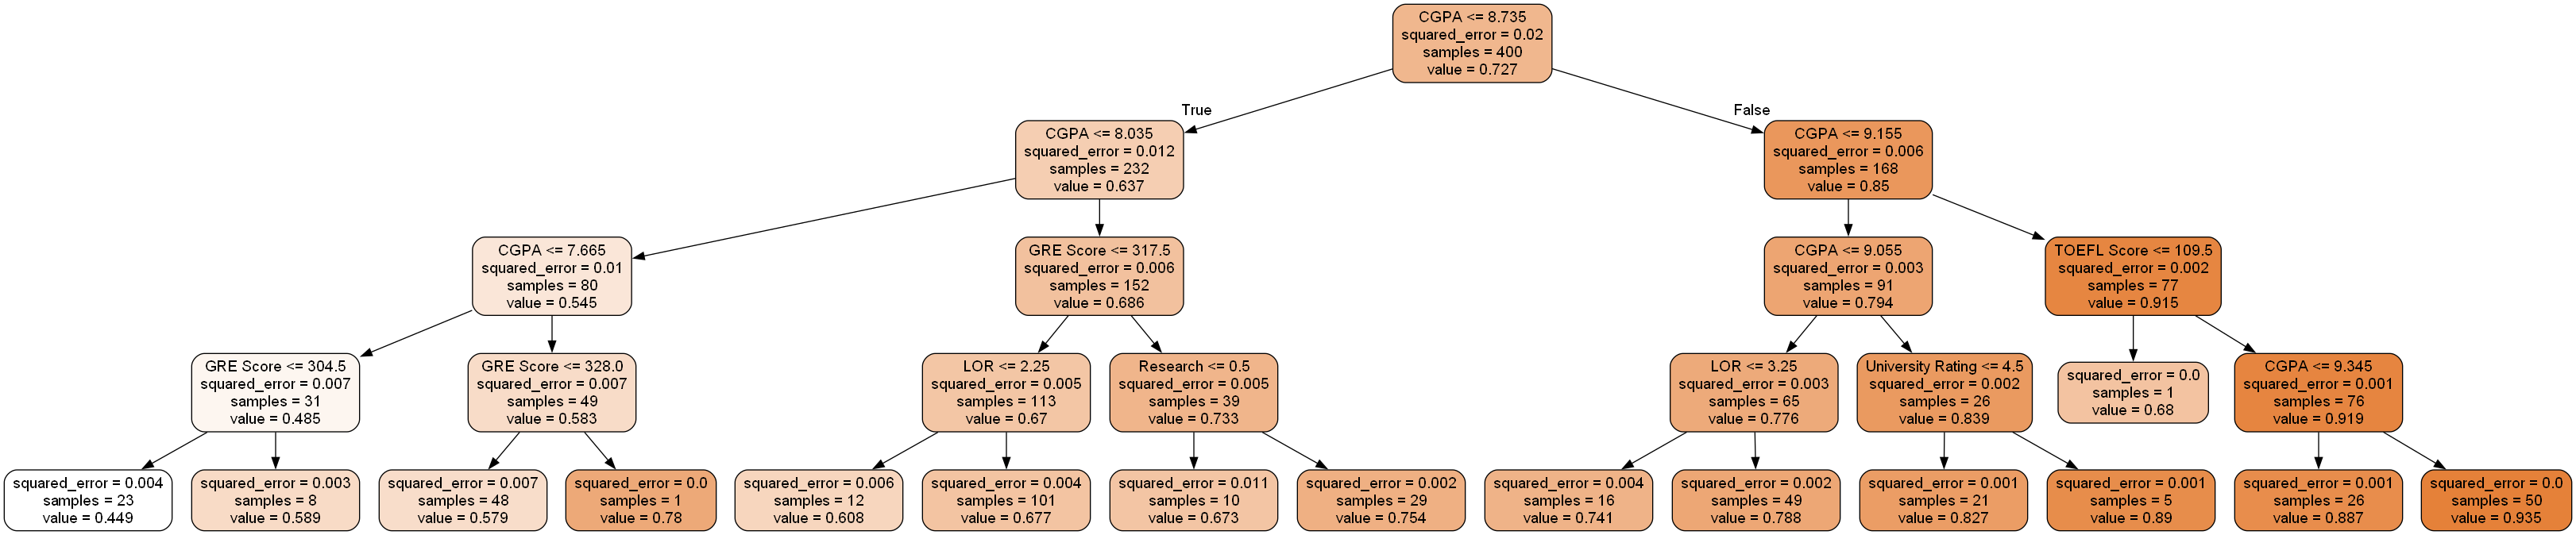

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# 데이터를 테스트 셋과 검증셋으로 나눕니다
from sklearn.model_selection import train_test_split
# 알고리즘 시각화
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
# decision tree 알고리즘 패키지 호출
from sklearn.tree import DecisionTreeRegressor

data_predict = pd.read_csv('Admission_Predict_Ver1.1.csv')
# x축 데이터는 합격률과 학생 일련번호 데이터를 제거한 나머지이다
# 학부성적, 추천서 등의 결과의 영향을 주는 데이터만 남기고 나머지를 제거하였다고 보면 됨
dataX = data_predict.drop(['Serial No.', 'Chance of Admit'], axis = 1)
# 내가 분석하려는 합격률 데이터를 y축데이터로 지정
dataY = data_predict['Chance of Admit']

# 데이터를 4:1 비율로 훈련셋과 검증셋으로 가른다 (무작위로)
# random_state=0 는 무작위 난수 번호 (seed)
# x축과 y축 데이터를 각각 train, test셋으로 나누고 
# test_size=0.2 즉, 0.8:0.2  4:1의 비율로 데이터를 나눈다.
X_train, X_test, y_train, y_test = train_test_split(
    dataX, dataY, test_size=0.2, random_state=0)

# 의사결정 트리 알고리즘 사용
model = DecisionTreeRegressor( random_state=0,
                              splitter='best',
                              # 최대 4단으로
                              max_depth = 4,
                              # 트리구성관련 설명변수 설정? 노노 기본으로...
                              max_features = None,
                              # 평균제곱 오차를 기준으로 모델 최적화
                              # 평균제곱 오차는 과거에 mse로 썻는데
                              # 패키지 업데이트로 문법이 바뀌어 에러표시되었음
                              criterion='squared_error',)

result = model.fit(X_train, y_train)

export_graphviz(result, out_file='tree.dot',
               feature_names = dataX.columns,
               rounded = True, proportion = False,
               filled = True)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', 'Gdpi=600'])

Image(filename = 'tree.png')

In [3]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.
